# Análise exploratória de dados

In [36]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

colors = ["#D04848", "#FDE767", "#6895D2"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [37]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição dos dados

Um conjunto de dados sobre carros e seus preços e características associados; fabricados entre 1970-82 nos EUA, Europa e Japão.

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University. O conjunto de dados foi usado na American Statistical Association Exposition de 1983.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [39]:
df.shape

(398, 9)

In [40]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## 2.1. Dicionário de dados

In [41]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Medida utilizada para determinar a eficiência ...,quantitativa,contínua
1,cylinders,Quantidade de cilindros,quantitativa,discreta
2,displacement,Se refere ao volume de gás sugado ou descarreg...,quantitativa,contínua
3,horsepower,Representa a quantidade de trabalho que um mot...,quantitativa,contínua
4,weight,Peso do veículo,quantitativa,contínua
5,acceleration,Mecanismo que permite ao motorista aumentar ou...,quantitativa,contínua
6,model_year,Ano de fabricação,quantitativa,discreta
7,origin,País de origem,qualitativa,nominal
8,name,Nome do modelo,qualitativa,nominal


#### São 9 variáveis, 5 quantitativas contínuas, 2 quantitativas discretas e 2 qualitativas nominais.

## 3. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?
* A eficiência de combsutível (mpg) variou ao longo dos anos de fabricação (model_year)?
* Existe uma relação entre o número de cilindros e a potência do motor (horsepower)?
* O peso do veículo influencia na aceleração (acceleration)? 

#### Existem dados faltantes, se sim quantos e em quais variáveis?

In [42]:
df.isnull().sum().sort_values(ascending=False)

horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [45]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [46]:
df["cylinders"] = df["cylinders"].astype("float64")
df["weight"] = df["weight"].astype("float64")
df["model_year"] = df["model_year"].astype("float64")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(7), object(2)
memory usage: 30.6+ KB


#### Qual a distribuição dos dados (variável por variável)?

In [48]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


* Existem três países de origem (``origin``)
* O País (``origin``) mais frequente é USA
* A média da eficiência de combsutível (``mpg``) é de 23, com um mínimo de 9 e máximo de 46
* A média de cilindros (``cylinders``) por carro é de 5, com um mínimo de 3 e máximo de 8
* A média de volume de gás (``displacement``) por carro é de 194, com um mínimo de 68 e máximo de 455
* A média de cavalos de potência (``horsepower``) por carro é de 104, com um mínimo de 46 e máximo de 230
* O peso (``weight``) varia entre 1.613 e 5.140, com média de 2.977
* A média de aceleração (``acceleration``) por carro é de 15, com um mínimo de 8 e máximo de 24
* O carro mais antigo (``model_year``) é do ano 1970 e o mais recente do ano 1982

In [49]:
df.origin.value_counts() 

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

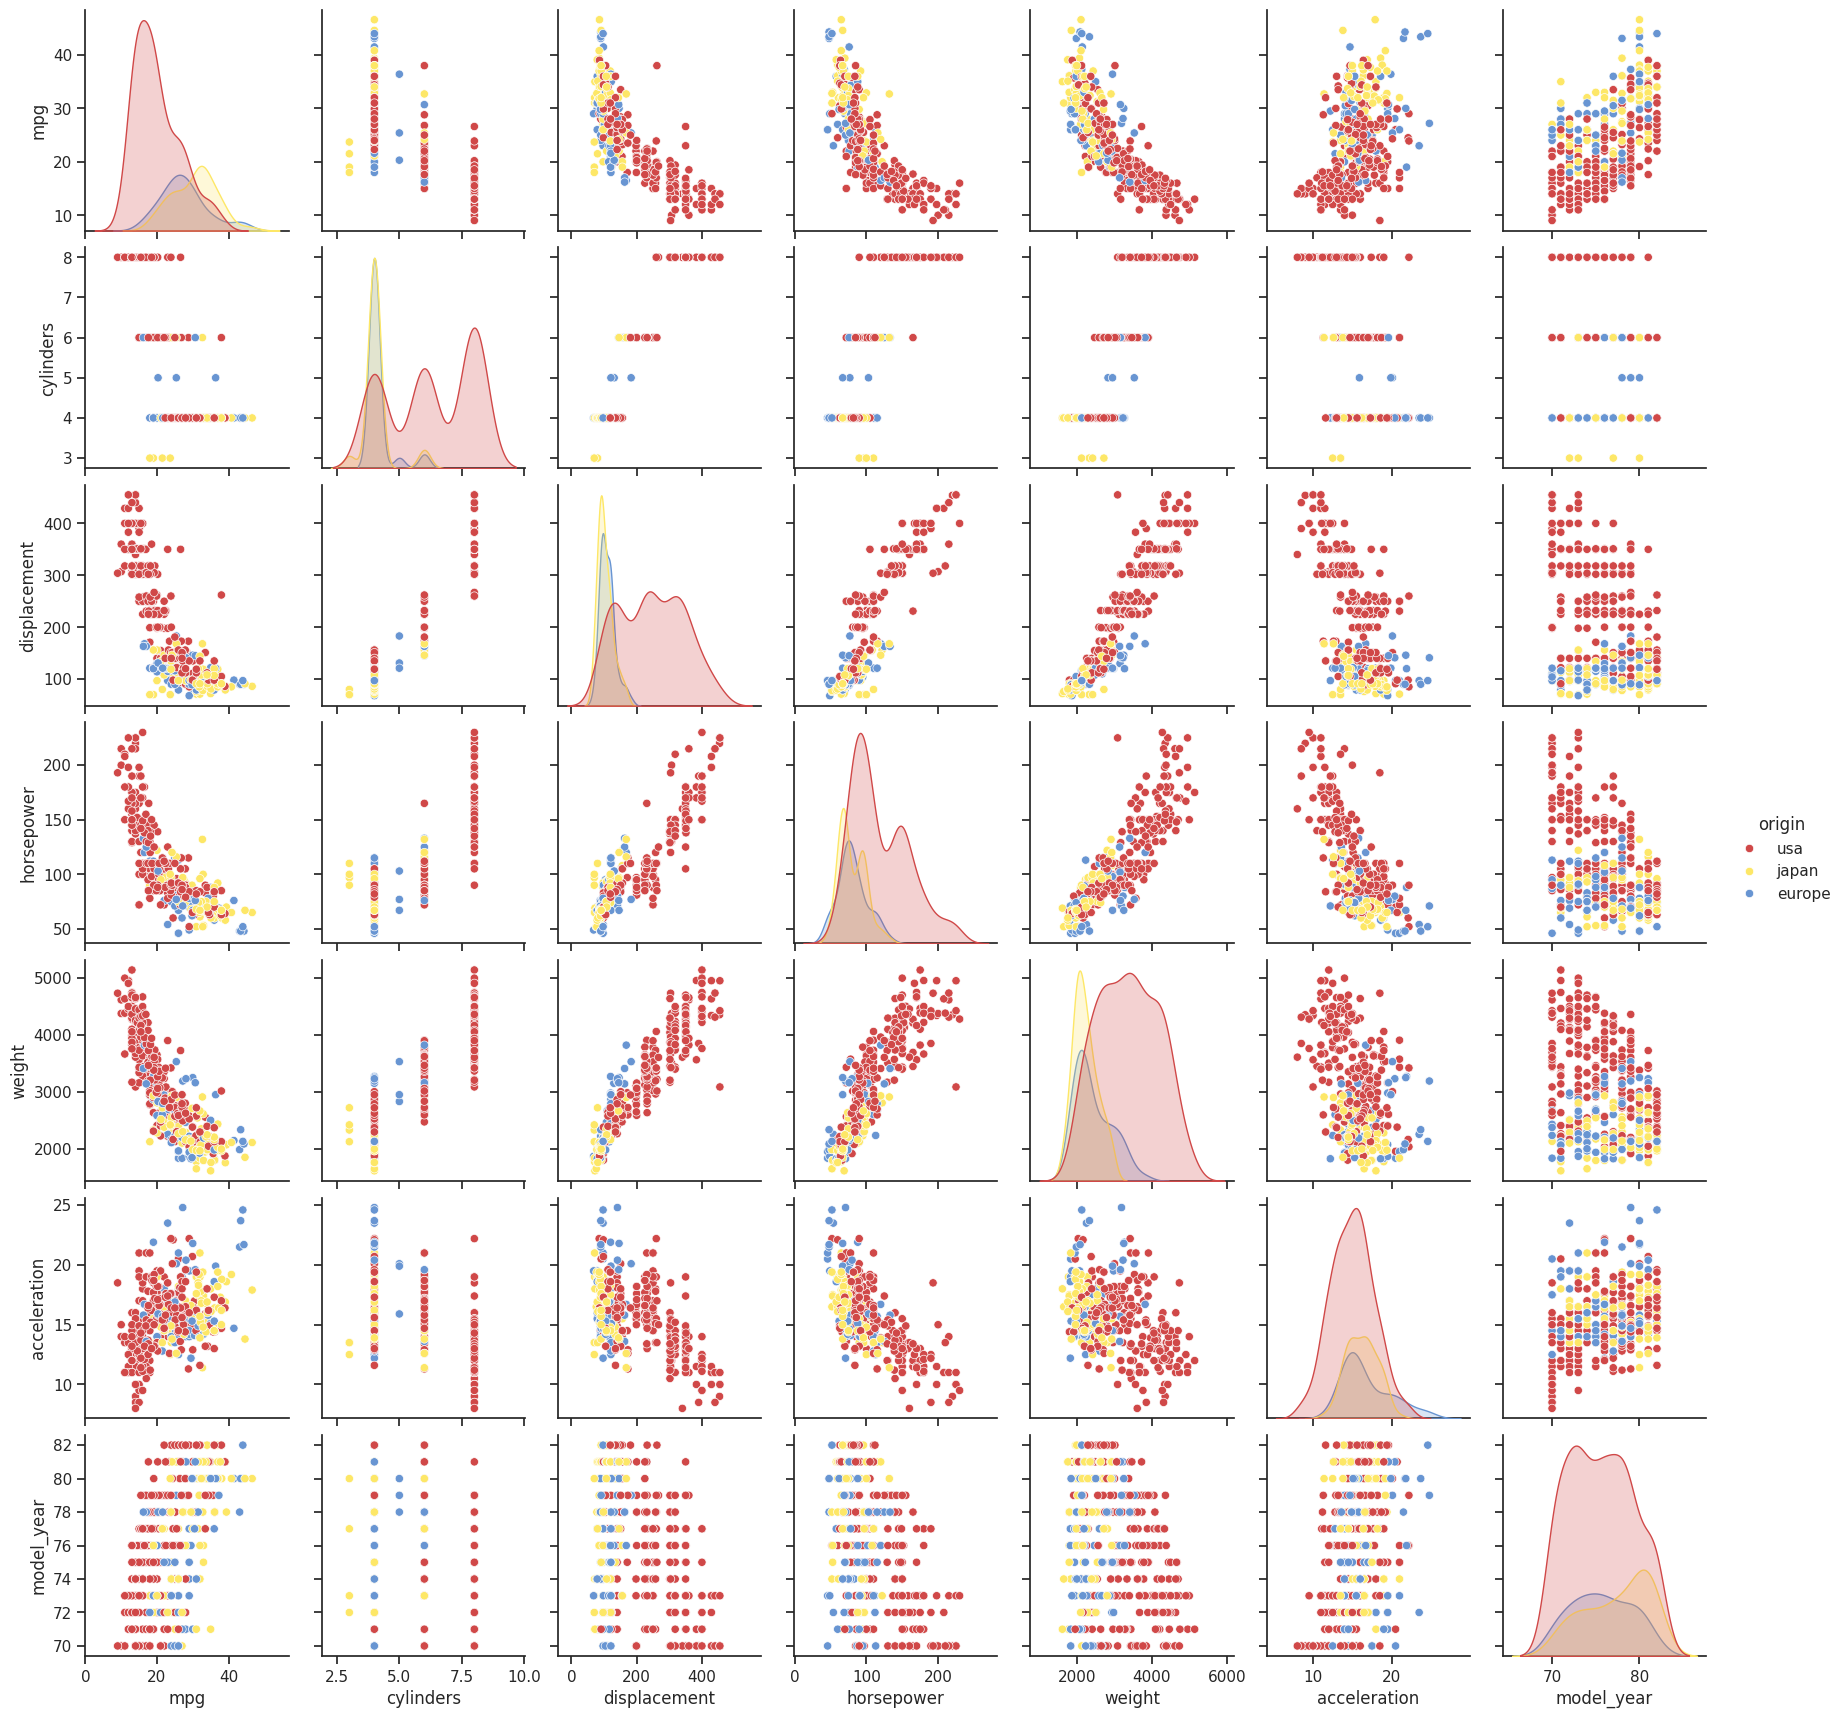

In [69]:
sns.pairplot(df, hue='origin')

#### A eficiência de combsutível (``mpg``) variou ao longo dos anos de fabricação (``model_year``)?

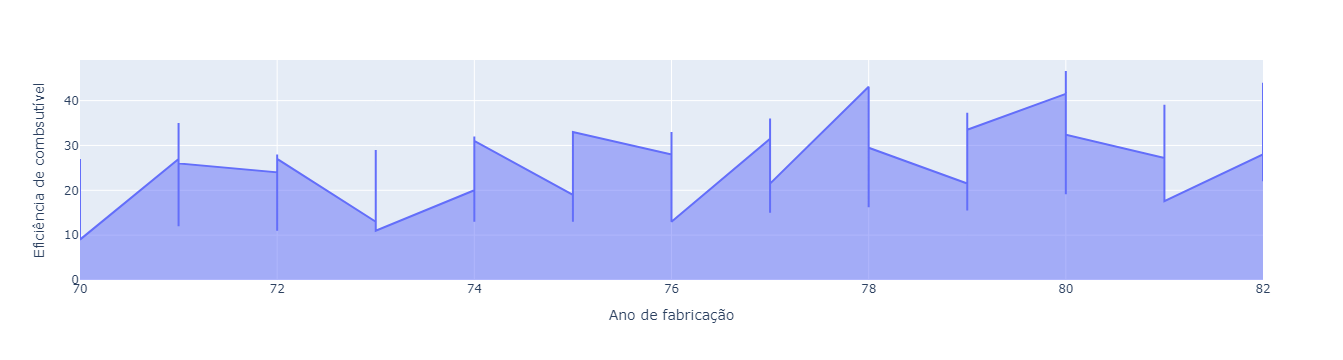

In [59]:
fig = px.area(df, x='model_year', y='mpg')
fig.update_layout(
    xaxis_title="Ano de fabricação",
    yaxis_title="Eficiência de combsutível")
fig.show()

#### Existe uma relação entre o número de cilindros (``cylinders``) e a potência do motor (``horsepower``)?

<Axes: xlabel='cylinders', ylabel='horsepower'>

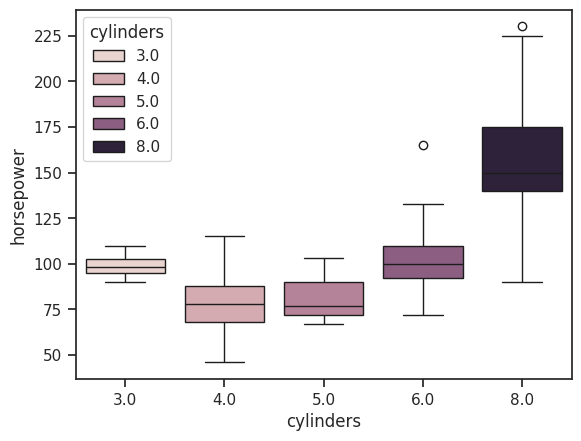

In [66]:
sns.boxplot(data=df, x='cylinders', y='horsepower', hue='cylinders')

#### O peso (``weight``) do veículo influencia na aceleração (``acceleration``)?

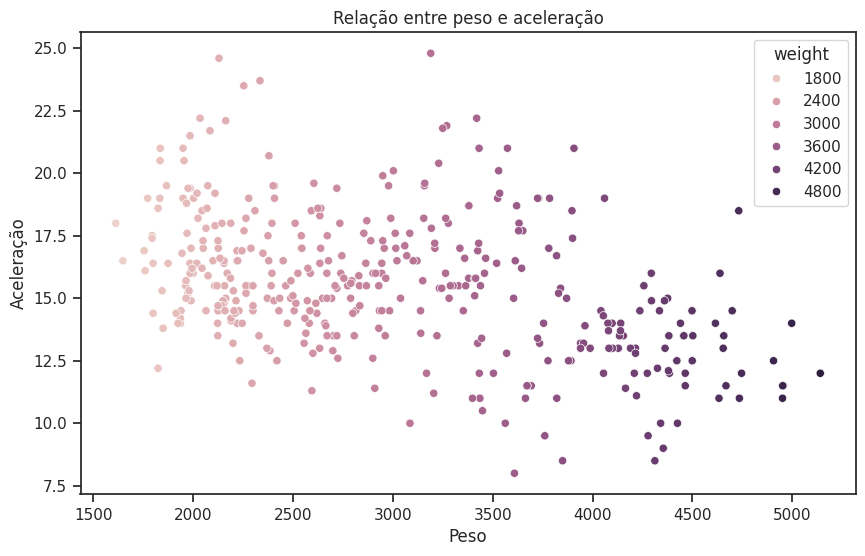

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='acceleration', hue='weight')
plt.title("Relação entre peso e aceleração")
plt.xlabel("Peso")
plt.ylabel("Aceleração")
plt.show()

## 3. Insights